# 130 percent #

In [28]:
import pickle 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [46]:
def total_lawyers(week_assignments):
    """
    Recibe una lista de listas de asignaciones.
    Calcula cuantos abogados distintos fueron asignados.
    """
    lawyers = set()
    for assignment in week_assignments:
        lawyers.update(assignments)
    return len(lawyers)

In [30]:
with open('results/130percent/assignments.pickle', 'rb') as file:
    assignments = pickle.load(file)
    
with open('results/130percent/spr.pickle', 'rb') as file:
    spr = pickle.load(file)

with open('results/130percent/sr.pickle', 'rb') as file:
    sr = pickle.load(file)
    
with open('results/130percent/time_lawyers.pickle', 'rb') as file:
    lawyers_time = pickle.load(file)
    
mode1, mode2 = 'saa', 'greedy'

### $\lambda$ = 0.8, rate = 1.25 ###

In [78]:
lamb = 0.8
rate = 1.25

saa_assignment = assignments[rate][lamb][mode1]
greedy_assignment = assignments[rate][lamb][mode2]

saa_sr = sr[rate][lamb][mode1]
saa_fo = {week: sum(ratings) for week, ratings in saa_sr.items()}
greedy_sr = sr[rate][lamb][mode2]
greedy_fo = {week: sum(ratings) for week, ratings in greedy_sr.items()}

saa_spr = spr[rate][lamb][mode1]
saa_penalized_fo = {week: sum(ratings) for week, ratings in saa_spr.items()}
greedy_spr = spr[rate][lamb][mode2]
greedy_penalized_fo = {week: sum(ratings) for week, ratings in greedy_spr.items()}

saa_times = lawyers_time[rate][lamb][mode1]
greedy_times = lawyers_time[rate][lamb][mode2]

weeks = list(assignments[rate][lamb][mode1].keys())
services_per_week = {week: len(saa_assignment[week]) for week in weeks}
greedy_per_week = {week: total_lawyers(greedy_assignment[week]) for week in weeks}
SAA_per_week = {week: total_lawyers(saa_assignment[week]) for week in weeks}

In [79]:
saa_fo = np.cumsum(list(saa_fo.values()))
saa_penalized_fo = np.cumsum(list(saa_penalized_fo.values()))
greedy_fo = np.cumsum(list(greedy_fo.values()))
greedy_penalized_fo = np.cumsum(list(greedy_penalized_fo.values()))

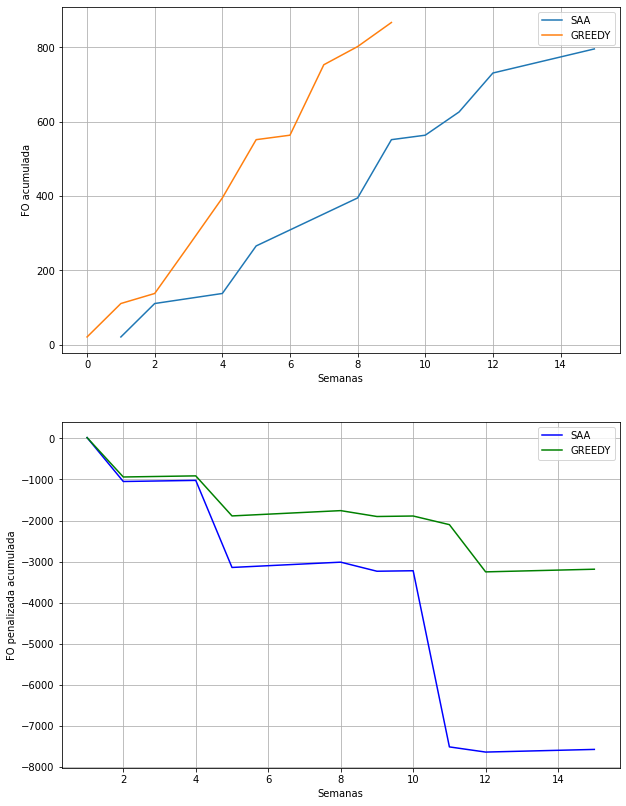

In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
ax1.plot(weeks, saa_fo, "b")
ax1.plot(weeks, greedy_fo, "g")
ax1.grid()
ax1.legend(['SAA', "GREEDY"])
ax1.set_ylabel('FO acumulada')
ax1.set_xlabel('Semanas')

ax2.plot(weeks, saa_penalized_fo, "b")
ax2.plot(weeks, greedy_penalized_fo, "g")
ax2.grid()
ax2.legend(['SAA', "GREEDY"])
ax2.set_ylabel('FO penalizada acumulada')
ax2.set_xlabel('Semanas')
plt.show()

In [89]:
greedy_fos = {}
greedy_pfos = {}
greedy_ass = {}
saa_fos = {}
saa_pfos = {}
saa_ass = {}
services = {}


for rate in assignments:
    for lamb in assignments[rate]:
        saa_sr = sr[rate][lamb][mode1]
        saa_fo = {week: sum(ratings) for week, ratings in saa_sr.items()}
        saa_fo = np.cumsum(list(saa_fo.values()))
        
        greedy_sr = sr[rate][lamb][mode2]
        greedy_fo = {week: sum(ratings) for week, ratings in greedy_sr.items()}
        greedy_fo = np.cumsum(list(greedy_fo.values()))

        
        saa_spr = spr[rate][lamb][mode1]
        saa_penalized_fo = {week: sum(ratings) for week, ratings in saa_spr.items()}
        saa_penalized_fo = np.cumsum(list(saa_penalized_fo.values()))
        
        greedy_spr = spr[rate][lamb][mode2]
        greedy_penalized_fo = {week: sum(ratings) for week, ratings in greedy_spr.items()}
        greedy_penalized_fo = np.cumsum(list(greedy_penalized_fo.values()))
        
        
        saa_assignment = assignments[rate][lamb][mode1]
        greedy_assignment = assignments[rate][lamb][mode2]
        weeks = list(assignments[rate][lamb][mode1].keys())
        services_per_week = [len(saa_assignment[week]) for week in weeks]
        greedy_per_week = [total_lawyers(greedy_assignment[week]) for week in weeks]
        saa_per_week = [total_lawyers(saa_assignment[week]) for week in weeks]
        
        
        greedy_fos[(rate, lamb)] = greedy_fo
        greedy_pfos[(rate, lamb)] = greedy_penalized_fo
        greedy_ass[(rate, lamb)] = greedy_per_week
        saa_fos[(rate, lamb)] = saa_fo
        saa_pfos[(rate, lamb)] = saa_penalized_fo
        saa_ass[(rate, lamb)] = saa_per_week
        services[(rate, lamb)] = services_per_week

In [ ]:
for rate, lamb in greedy_fos.keys():
    

In [90]:
with open('results/40/assignments.pickle', 'rb') as file:
    assignments = pickle.load(file)
    
with open('results/40/spr.pickle', 'rb') as file:
    spr = pickle.load(file)

with open('results/40/sr.pickle', 'rb') as file:
    sr = pickle.load(file)
    
with open('results/40/time_lawyers.pickle', 'rb') as file:
    lawyers_time = pickle.load(file)
    
mode1, mode2 = 'saa', 'greedy'

In [95]:
rate = 1.25
lamb = 0.5
assignments[rate][lamb]["saa"]

{1: [[3], [4], [14]],
 2: [[2], [0, 1], [0]],
 4: [[4], [12], [12]],
 5: [[4], [9], [12], [0], [], [0]],
 8: [[14], [17]],
 9: [[15], [16]],
 10: [[3]],
 11: [[4], [5], [13], [14], [16]],
 12: [[17], [14], [14], [6]],
 15: [[5], [3], [9]]}